# IMPORTS

In [2]:
# \\  -------- IMPORTS -------- //

from ast import Return
from codecs import getdecoder
from pkgutil import get_data
from typing import List
from unicodedata import name
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt



import backtrader as bt
import talib

# cyclical imports
from statsmodels.tsa.filters.hp_filter import hpfilter


# for outliers in data cleaning
from scipy import stats

# Data API
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

df = 0
df1 = 0

end = dt.datetime.now()  # end date is now
start = dt.datetime(1980, 1, 1)   # start date 



# IMPORTING DATA

In [3]:
# economic metrics from FRED Data

# labour force participation rate 
# RATES = US 'DFF'

#demographic data 

#risk free rate
riskfreerate = ['DGS3MO'] # 3 month t bills

# US
USGDP = ['GDP'] # GDP QUARTERLY 
USGDPQQ = ['A191RL1Q225SBEA'] # USGDPQQ
USCPI = ['CPIAUCSL'] # CPI monthly
USCPIMM = ['CORESTICKM159SFRBATL'] # CPI MOM
USUR = ['U2RATE'] # UNEMP monthly

USINTR = ['DFF'] # US INTEREST RATE

# EURO
EUGDP = ['CLVMEURSCAB1GQEA19'] # GDP QUARTERLY

EUCPI = ['CP0000EZ19M086NEST'] # CPI monthy

EUUR = ['LRHUTTTTEUM156S'] # UNEMP monthly
#EconomiclistRatesEURO = ['IRLTLT01DEM156N']
#EconomiclistEconomicsEURO = ['NGDPRSAXDCDEQ', 'DEUCPIALLMINMEI', 'LMUNRRTTDEM156S', 'DEUCPIENGAINMEI', 'LFWA64TTDEQ647S']

EUINTR = ['ECBDFR'] #EU INTEREST RATE

# UK
UKGDP = ['CLVMNACSCAB1GQUK'] # GDP QUARTERLY

UKCPI = ['GBRCPIALLMINMEI'] # CPI monthy

UKUR = ['AURUKM'] # UNEMP monthly
#EconomiclistRatesUK = ['IRLTLT01GBM156N']
#EconomiclistEconomicsUK = ['GBRCPIALLMINMEI', 'UKNGDP', 'CPALTT01GBM659N', 'LFWA64TTGBQ647S', 'LRHUTTTTGBM156S']

GBINTR = ['IUDSOIA'] # GB INTEREST RATE

# NZD
NZGDP = ['NAEXKP01NZQ189S'] # GDP QUARTERLY

NZCPI = ['NZLCPIALLQINMEI'] # CPI quarterly

NZUR = ['LRUNTTTTNZQ156S'] # UNEMP quarterly
#EconomiclistRatesEURO = ['IR3TBB01NZM156N', 'NZLCPIALLQINMEI', 'IRLTLT01NZM156N']
#EconomiclistEconomicsEURO = ['LRUNTTTTNZQ156S']

NZINTR = ['IR3TBB01NZM156N'] # NEW ZEALAND INTEREST RATE

#AUD
AUDGDP = ['NGDPRSAXDCAUQ'] # GDP QUARTERLY

AUDCPI = ['CPALTT01AUQ659N'] # CPI quarterly

AUDUR = ['LRUNTTTTAUM156S'] # UNEMP monthly
#EconomiclistRatesAUD = ['IR3TBB01AUQ156N', 'NGDPRSAXDCAUQ', 'AUSCPIALLQINMEI', 'IRLTLT01AUM156N', 'IR3TIB01AUM156N', 'INTDSRAUM193N']
#EconomiclistEconomicsAUD = ['LRHUTTTTAUM156S']
AUINTR = ['IR3TBB01AUM156N'] # AU INTEREST RATES
#CAD
CADGDP = ['NAEXKP01CAQ189S'] # GDP QUARTERLY

CADCPI = ['CPALCY01CAM661N'] # CPI monthy

CADUR = ['LRUNTTTTCAM156S'] # UNEMP monthly
#EconomiclistRatesEURO = ['CPALCY01CAM661N', 'NGDPRSAXDCCAQ', 'LRUNTTTTCAM156S', 'IRLTLT01CAM156N', 'IR3TIB01CAM156N']
#EconomiclistEconomicsEURO = ['MKTGDPCAA646NWDB']
CAINTR = ['IRSTCB01CAM156N'] # CANADA INTEREST RATES

#CHF
CHFGDP = ['CLVMNACSAB1GQCH'] # GDP QUARTERLY

CHFCPI = ['CPALTT01CHM657N'] # CPI monthy

CHFUR = ['LMUNRRTTCHM156S'] # UNEMP monthly
#EconomiclistRatesCHF = ['IRLTLT01CHM156N', 'CHECPIALLMINMEI', 'IR3TIB01CHM156N']
#EconomiclistEconomicsCHF = ['LMUNRRTTCHM156S', 'CHECPIENGQINMEI']
CHINTR = ['IRLTLT01CHM156N'] # SWISS INTEREST RATE

#JPY
JPYGDP = ['JPNRGDPEXP'] # GDP QUARTERLY

JPYCPI = ['JPNCPIALLMINMEI'] # CPI monthy

JPYUR = ['LRUN64TTJPM156S'] # UNEMP monthly
#EconomiclistRatesJPY = ['IRLTLT01JPM156N', 'IR3TIB01JPM156N', 'IR3TCD01JPM156N']
#EconomiclistEconomicsJPY = ['JPNRGDPEXP', 'JPNCPIALLMINMEI', 'JPNNGDP', 'LFWA64TTJPM647S', 'LRUN64TTJPM156S']

JPINTR = ['IRSTCI01JPM156N'] #JPINTEREST RATE

# MAKE INTO  lists of different frequencies # update make one list as i can ffill them all the saem even starting as different frequencies



Economiclist = riskfreerate + USGDP + USGDPQQ + USCPI + USCPIMM + USUR + USINTR + EUUR  + EUGDP + EUCPI + EUUR + EUINTR + UKGDP  + UKCPI  + UKUR + GBINTR + NZGDP  + NZCPI  + NZUR + NZINTR + AUDGDP + AUDCPI + AUDUR + AUINTR + CADGDP + CADCPI + CADUR + CAINTR + CHFGDP + CHFCPI + CHFUR + CHINTR + JPYGDP + JPYCPI + JPYUR + JPINTR


df2_quarterly = pdr.get_data_fred(Economiclist, start, end)



## CLEANING THE DATA

In [79]:
# clean the economic data

result_eco = df2_quarterly.asfreq('D')

result_eco = result_eco.interpolate(method = 'linear') # fill gaps to the correct frequency

result_eco = result_eco.fillna(method = 'ffill')

result_eco = result_eco.fillna(method = 'backfill')

result_eco = result_eco[(np.abs(stats.zscore(result_eco)) < 10).all(axis=1)] # remove any extreme outliers

# drop duplicate columns
result_eco = result_eco.loc[:, ~result_eco.columns.duplicated()]

In [107]:
# MAKING YOY CHARTS

result_eco['EUGDPYY'] = result_eco['CLVMEURSCAB1GQEA19'].pct_change()

result_eco['EUGDPYY_diff'] = result_eco['CLVMEURSCAB1GQEA19'].diff()

result_eco['EUCPIYY'] = result_eco['CP0000EZ19M086NEST'].pct_change()

result_eco['UKGDPYY'] = result_eco['CLVMNACSCAB1GQUK'].pct_change()

result_eco['UKCPIYY'] = result_eco['GBRCPIALLMINMEI'].pct_change()

result_eco['NZGDPYY'] = result_eco['NAEXKP01NZQ189S'].pct_change()

result_eco['NZCPIYY'] = result_eco['NZLCPIALLQINMEI'].pct_change()

result_eco['AUDGDPYY'] = result_eco['NGDPRSAXDCAUQ'].pct_change()

result_eco['AUDCPIYY'] = result_eco['CPALTT01AUQ659N'].pct_change()

result_eco['CADGDPYY'] = result_eco['NAEXKP01CAQ189S'].pct_change()

result_eco['CADCPIYY'] = result_eco['CPALCY01CAM661N'].pct_change()

result_eco['CHFGDPYY'] = result_eco['CLVMNACSAB1GQCH'].pct_change()

result_eco['CHFCPIYY'] = result_eco['CPALTT01CHM657N'].pct_change()

result_eco['JPYGDPYY'] = result_eco['JPNRGDPEXP'].pct_change()

result_eco['JPYCPIYY'] = result_eco['JPNCPIALLMINMEI'].pct_change()

In [80]:
# clean the economic data

result_eco = result_eco.asfreq('D')

result_eco = result_eco.interpolate(method = 'linear') # fill gaps to the correct frequency

result_eco = result_eco.fillna(method = 'ffill')

result_eco = result_eco.fillna(method = 'backfill')

#result_eco = result_eco[(np.abs(stats.zscore(result_eco)) < 10).all(axis=1)] # remove any extreme outliers

# drop duplicate columns
#result_eco = result_eco.loc[:, ~result_eco.columns.duplicated()]

In [81]:
import itertools

r_df = result_eco

#r_df = r_df.iloc[4000:, :]
r_df = r_df.iloc[1000:, :]
# get a list of column names
columns = list(r_df.columns)

# create all possible combinations of column names
combinations = list(itertools.combinations(columns, 2))

# loop through the combinations and create new columns
for c in combinations:
    col_name = c[0] + '_' + c[1]
    r_df[col_name] = r_df[c[0]] * r_df[c[1]]

result_eco_ratio = r_df

C:\Users\Christopher!\AppData\Local\Temp\ipykernel_19660\1868727336.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_df[col_name] = r_df[c[0]] * r_df[c[1]]
C:\Users\Christopher!\AppData\Local\Temp\ipykernel_19660\1868727336.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_df[col_name] = r_df[c[0]] * r_df[c[1]]
C:\Users\Christopher!\AppData\Local\Temp\ipykernel_19660\1868727336.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [82]:
import itertools

r_df = result_eco

#r_df = r_df.iloc[4000:, :]
r_df = r_df.iloc[1000:, :]
# get a list of column names
columns = list(r_df.columns)

# create all possible combinations of column names
combinations = list(itertools.combinations(columns, 2))

# loop through the combinations and create new columns
for c in combinations:
    col_name = c[0] + '-' + c[1]
    r_df[col_name] = r_df[c[0]] - r_df[c[1]]

result_eco_minus = r_df

C:\Users\Christopher!\AppData\Local\Temp\ipykernel_19660\1827038204.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_df[col_name] = r_df[c[0]] - r_df[c[1]]
C:\Users\Christopher!\AppData\Local\Temp\ipykernel_19660\1827038204.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_df[col_name] = r_df[c[0]] - r_df[c[1]]
C:\Users\Christopher!\AppData\Local\Temp\ipykernel_19660\1827038204.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [83]:
# join two dataframes together where each column is different - so there is only on instance of every unique column

#join
eco_data_full = pd.concat([result_eco_minus, result_eco_ratio], axis = 1)

#get columns that appear more than once
eco_data_full_cols = eco_data_full.columns[eco_data_full.columns.duplicated()]

#drop columns where the heading appears more than once
eco_data_full = eco_data_full.drop(eco_data_full_cols, axis=1)

## ASSET DATA

In [84]:
# import asset data
data = yfin.download(("SPY", 'DX-Y.NYB', 'CL=F', 'GBPUSD=X', 'XRP-USD'), start="1980-01-01", end= dt.datetime.now())

data_1 = pd.DataFrame(data["Close"])

# clean the data

df_asset = data_1.asfreq('D')

df_asset = df_asset.interpolate(method = 'linear') # fill gaps to the correct frequency

df_asset = df_asset.fillna(method = 'ffill')

df_asset = df_asset.fillna(method = 'backfill')

df_asset = df_asset[(np.abs(stats.zscore(df_asset)) < 10).all(axis=1)] # remove any extreme outliers

[*********************100%***********************]  5 of 5 completed


In [85]:
#joining economic and asset data
data = pd.concat([eco_data_full, df_asset], axis = 1)

data = data.fillna(method = 'ffill')

data = data.fillna(method = 'backfill')


# CURRENT QUAD

# HOW EACH ASSET PERFORMS IN THE QUADS

## SELECT ASSET

<AxesSubplot:>

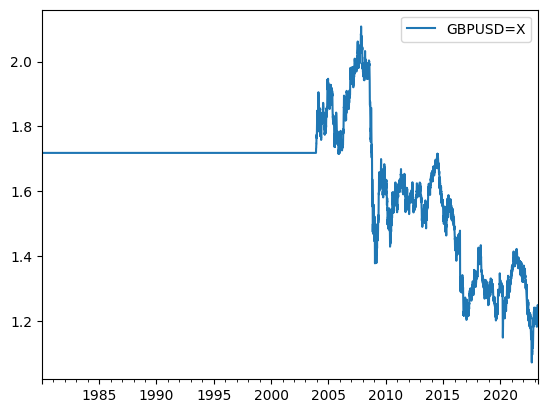

In [86]:
# select asset
asset = ['GBPUSD=X']
data[asset].plot()

# WHAT ECONOMIC STAT HAS THE HIGHEST RELATIONSHIP TO THE SELECTED ASSET

In [87]:
temp_corr = pd.concat([eco_data_full, data[asset]], axis = 1)
temp_corr = temp_corr.corr()
temp_corr = temp_corr[asset].sort_values(by = asset, ascending = False)
temp_corr = temp_corr.drop(index='GBPUSD=X')
temp_corr[:10]

,GBPUSD=X
CLVMNACSCAB1GQUK-NGDPRSAXDCAUQ,0.838743
NAEXKP01NZQ189S_IRLTLT01CHM156N,0.776662
IRLTLT01CHM156N_LRUN64TTJPM156S,0.774220
CLVMNACSCAB1GQUK_IRLTLT01CHM156N,0.773172
NGDPRSAXDCAUQ_IRLTLT01CHM156N,0.770732
NAEXKP01CAQ189S_IRLTLT01CHM156N,0.769993
CLVMNACSCAB1GQUK_IUDSOIA,0.765913
CLVMEURSCAB1GQEA19_IUDSOIA,0.759085
ECBDFR_JPNRGDPEXP,0.755834
IUDSOIA_NAEXKP01CAQ189S,0.750023


<AxesSubplot:>

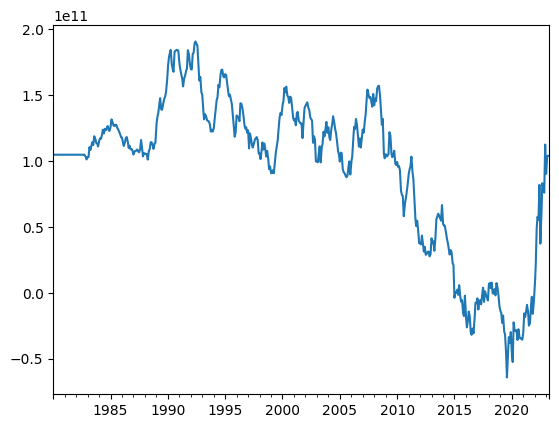

In [93]:
data['NAEXKP01NZQ189S_IRLTLT01CHM156N'].plot()

# DESCRIPTIVE STATS
## HOW MUCH DOES THE ENVIRONMENT VARIABLE EFFECT THE ASSET

In [20]:
# what is the relationship like between the asset and CPI and GDP
# get returns of both and plot on a scatter graph

In [21]:
asset_returns = data[asset].pct_change()

economic_returns = data['A191RL1Q225SBEA']


<AxesSubplot:>

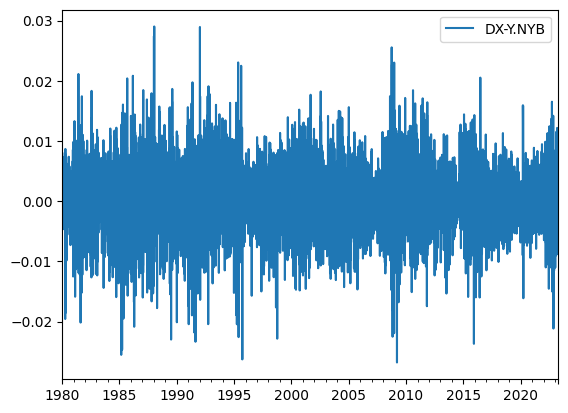

In [22]:
asset_returns.plot()

<AxesSubplot:>

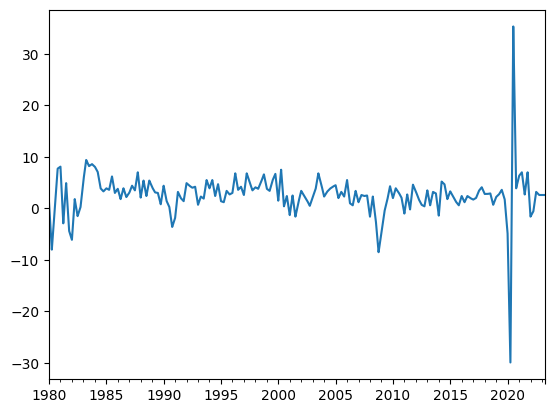

In [23]:
economic_returns.plot()

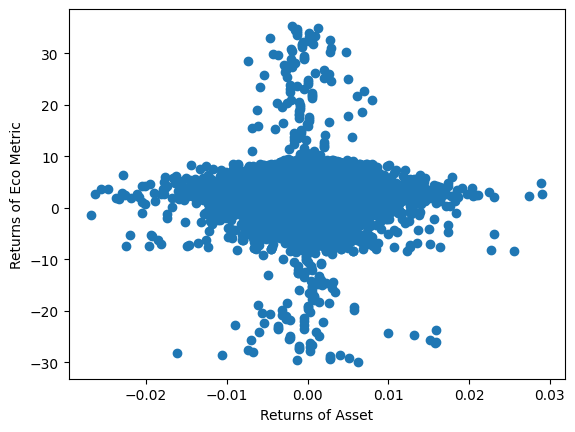

In [24]:
plt.scatter(asset_returns, economic_returns)
plt.xlabel('Returns of Asset')
plt.ylabel('Returns of Eco Metric')
plt.show()
plt.show()

# DOING THE SAME ANALYSIS BUT LOOPING THROUGH TO SEE VARIOUS ASSESTS AND THERE PERFORMANCES OVER THE QUADS